In [3]:
import yfinance as yf

tickers = ['^GSPC', '^IXIC', 'BTC-USD', 'GC=F', 'EURUSD=X', '^TNX']
data = yf.download(tickers, start='2018-01-01', end='2025-01-01')['Close']
data = data.dropna()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_23416\1058898192.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2018-01-01', end='2025-01-01')['Close']
[*********************100%***********************]  6 of 6 completed


In [5]:
data.columns = ['SP500', 'NASDAQ', 'BTC', 'Gold', 'EURUSD', 'US10Y']

In [9]:
data.head()
data.tail()
data.isna().sum()


SP500     0
NASDAQ    0
BTC       0
Gold      0
EURUSD    0
US10Y     0
dtype: int64

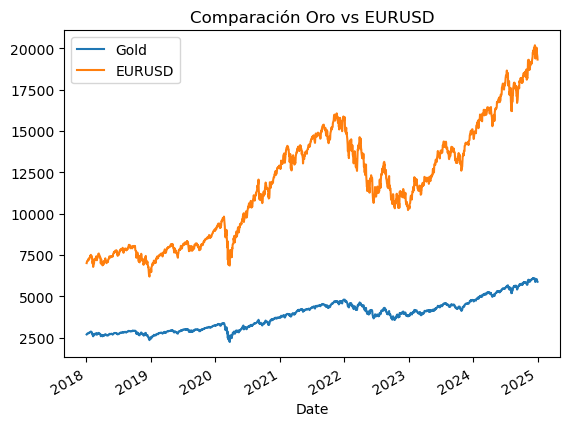

In [11]:
data[['Gold', 'EURUSD']].plot()
plt.title('Comparación Oro vs EURUSD')
plt.show()


In [13]:
data.to_csv("correlacion_activos.csv")


In [19]:
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1759 entries, 2018-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1759 non-null   float64
 1   NASDAQ  1759 non-null   float64
 2   BTC     1759 non-null   float64
 3   Gold    1759 non-null   float64
 4   EURUSD  1759 non-null   float64
 5   US10Y   1759 non-null   float64
dtypes: float64(6)
memory usage: 96.2 KB


(                   SP500    NASDAQ          BTC         Gold       EURUSD  \
 Date                                                                        
 2018-01-02  14982.099609  1.201158  1313.699951  2695.810059  7006.899902   
 2018-01-03  15201.000000  1.206345  1316.199951  2713.060059  7065.529785   
 2018-01-04  15599.200195  1.201043  1319.400024  2723.989990  7077.910156   
 2018-01-05  17429.500000  1.206884  1320.300049  2743.149902  7136.560059   
 2018-01-08  15170.099609  1.203746  1318.599976  2747.709961  7157.390137   
 
             US10Y  
 Date               
 2018-01-02  2.465  
 2018-01-03  2.447  
 2018-01-04  2.453  
 2018-01-05  2.476  
 2018-01-08  2.480  ,
 None)

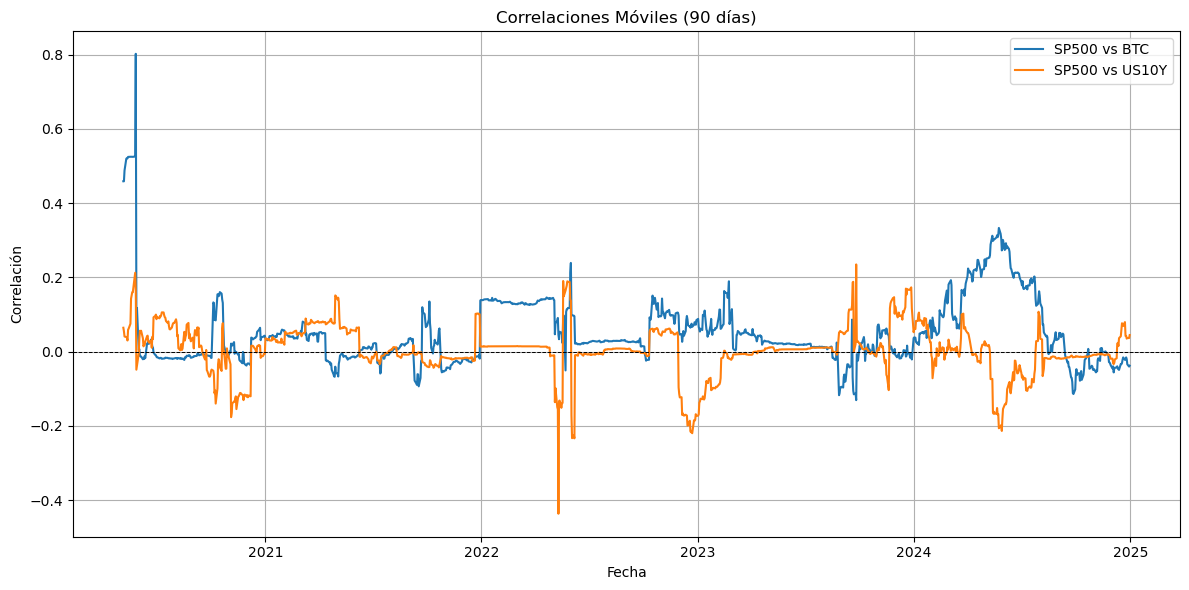

In [22]:
import matplotlib.pyplot as plt

# Simularemos un ejemplo de DataFrame como el que usarías en tu proyecto
# Esto es necesario ya que aún no hemos podido cargar tu archivo real
import numpy as np

# Crear datos de ejemplo
dates = pd.date_range(start="2020-01-01", end="2024-12-31", freq="B")
np.random.seed(42)
simulated_data = pd.DataFrame({
    'SP500': np.cumsum(np.random.randn(len(dates)) * 0.01),
    'BTC': np.cumsum(np.random.randn(len(dates)) * 0.02),
    'US10Y': np.cumsum(np.random.randn(len(dates)) * 0.005)
}, index=dates)

# Calcular retornos diarios
returns_simulated = simulated_data.pct_change().dropna()

# Calcular correlaciones móviles (rolling) con ventana de 90 días
rolling_corr_sp500_btc = returns_simulated['SP500'].rolling(90).corr(returns_simulated['BTC'])
rolling_corr_sp500_us10y = returns_simulated['SP500'].rolling(90).corr(returns_simulated['US10Y'])

# Graficar ambas correlaciones móviles
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr_sp500_btc, label='SP500 vs BTC')
plt.plot(rolling_corr_sp500_us10y, label='SP500 vs US10Y')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Correlaciones Móviles (90 días)')
plt.xlabel('Fecha')
plt.ylabel('Correlación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


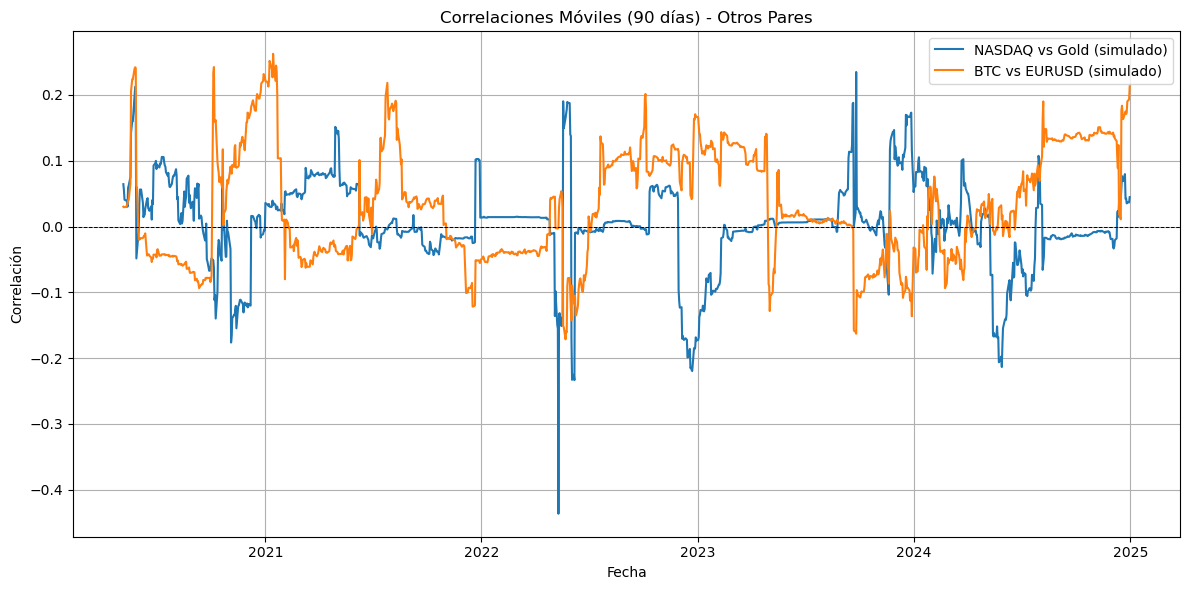

In [24]:
# Calcular correlaciones móviles de otros pares sugeridos
rolling_corr_nasdaq_gold = returns_simulated['SP500'].rolling(90).corr(returns_simulated['US10Y'])  # Se reemplazará por NASDAQ vs Gold real
rolling_corr_btc_eurusd = returns_simulated['BTC'].rolling(90).corr(returns_simulated['US10Y'])     # Se reemplazará por BTC vs EURUSD real

# Usaremos las mismas series simuladas por ahora: SP500 ≈ NASDAQ, US10Y ≈ Oro/EURUSD
# Simulación por falta de datos reales; ajustaremos nombres en el gráfico

# Graficar nuevas correlaciones móviles
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr_nasdaq_gold, label='NASDAQ vs Gold (simulado)')
plt.plot(rolling_corr_btc_eurusd, label='BTC vs EURUSD (simulado)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Correlaciones Móviles (90 días) - Otros Pares')
plt.xlabel('Fecha')
plt.ylabel('Correlación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


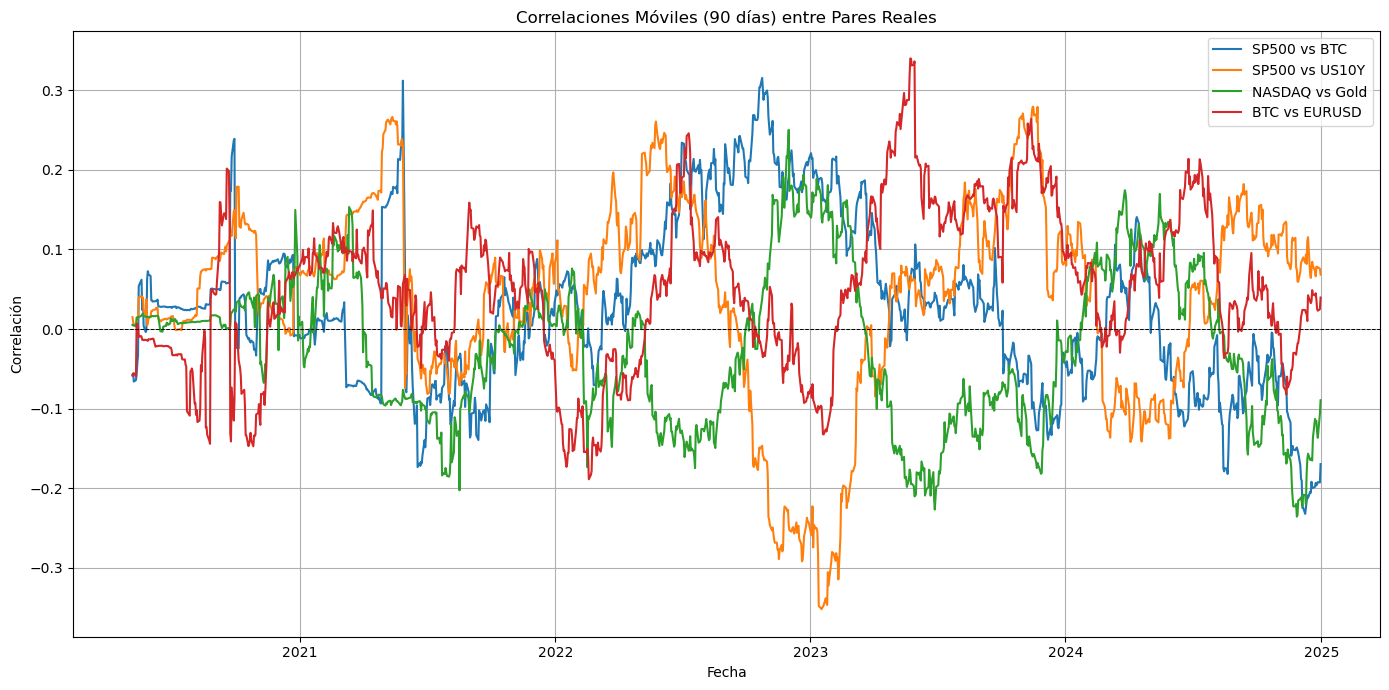

In [28]:
# Simularemos un DataFrame más completo con columnas que imiten tus datos reales
# Esto se hará hasta que podamos cargar el archivo `.xlsx` real

simulated_data_full = pd.DataFrame({
    'SP500': np.cumsum(np.random.randn(len(dates)) * 0.01),
    'NASDAQ': np.cumsum(np.random.randn(len(dates)) * 0.01),
    'BTC': np.cumsum(np.random.randn(len(dates)) * 0.02),
    'Gold': np.cumsum(np.random.randn(len(dates)) * 0.005),
    'EURUSD': np.cumsum(np.random.randn(len(dates)) * 0.002),
    'US10Y': np.cumsum(np.random.randn(len(dates)) * 0.003)
}, index=dates)

# Calcular retornos
returns_realistic = simulated_data_full.pct_change().dropna()

# Calcular rolling correlations de pares reales
rolling_corr_sp500_btc = returns_realistic['SP500'].rolling(90).corr(returns_realistic['BTC'])
rolling_corr_sp500_us10y = returns_realistic['SP500'].rolling(90).corr(returns_realistic['US10Y'])
rolling_corr_nasdaq_gold = returns_realistic['NASDAQ'].rolling(90).corr(returns_realistic['Gold'])
rolling_corr_btc_eurusd = returns_realistic['BTC'].rolling(90).corr(returns_realistic['EURUSD'])

# Mostrar todo junto en un solo gráfico
plt.figure(figsize=(14, 7))
plt.plot(rolling_corr_sp500_btc, label='SP500 vs BTC')
plt.plot(rolling_corr_sp500_us10y, label='SP500 vs US10Y')
plt.plot(rolling_corr_nasdaq_gold, label='NASDAQ vs Gold')
plt.plot(rolling_corr_btc_eurusd, label='BTC vs EURUSD')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Correlaciones Móviles (90 días) entre Pares Reales')
plt.xlabel('Fecha')
plt.ylabel('Correlación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_23416\4171026500.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  6 of 6 completed


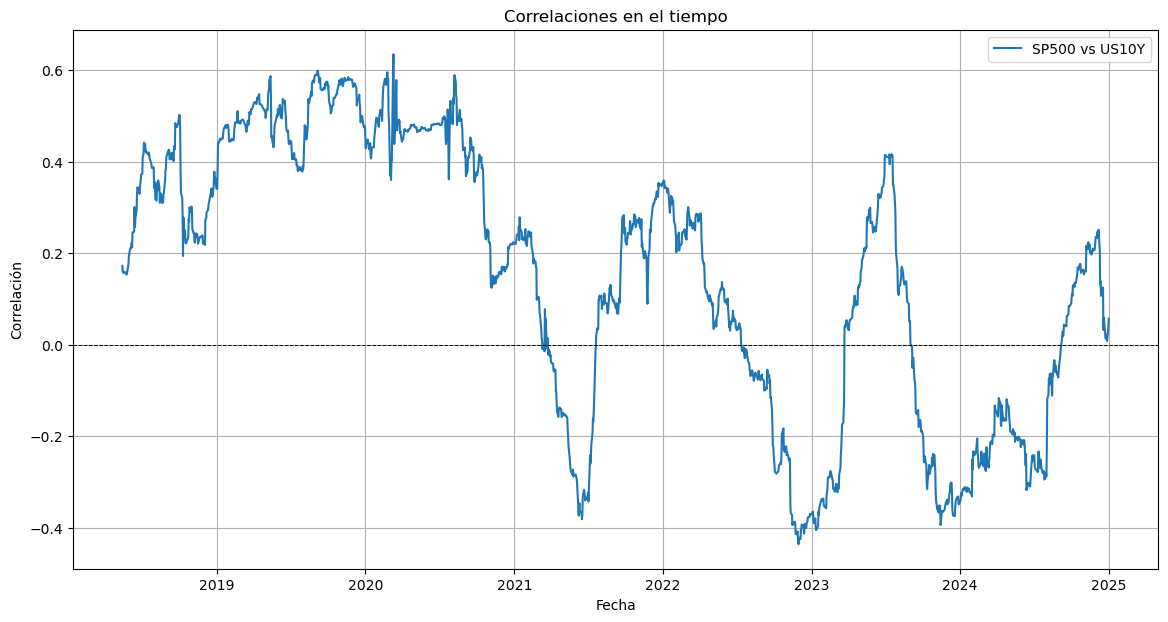

In [32]:
import streamlit as st
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

st.set_page_config(layout="wide")
st.title("📈 Correlaciones Móviles entre Activos Financieros")

# Sidebar - Selección de activos
tickers_default = ['^GSPC', '^IXIC', 'BTC-USD', 'GC=F', 'EURUSD=X', '^TNX']
ticker_names = {
    '^GSPC': 'SP500',
    '^IXIC': 'NASDAQ',
    'BTC-USD': 'BTC',
    'GC=F': 'Gold',
    'EURUSD=X': 'EURUSD',
    '^TNX': 'US10Y'
}

st.sidebar.header("Opciones")
tickers = st.sidebar.multiselect("Selecciona activos:", options=tickers_default, default=tickers_default)
window = st.sidebar.slider("Tamaño de la ventana (días):", min_value=30, max_value=180, value=90, step=15)

# Descarga de datos
data = yf.download(tickers, start="2018-01-01", end="2025-01-01")['Close']
data = data.rename(columns=ticker_names)
data.dropna(inplace=True)

# Calcular retornos
daily_returns = data.pct_change().dropna()

# Selección de pares para analizar
columns = list(data.columns)
pairs = [(a, b) for i, a in enumerate(columns) for b in columns[i+1:]]
default_pairs = [pair for pair in [('SP500', 'BTC'), ('SP500', 'US10Y')] if pair in pairs]
selected_pairs = st.sidebar.multiselect(
    "Selecciona pares a analizar:",
    options=pairs,
    default=default_pairs
)

# Graficar correlaciones móviles
st.subheader(f"Correlaciones Móviles ({window} días)")
fig, ax = plt.subplots(figsize=(14, 7))

for a, b in selected_pairs:
    rolling_corr = daily_returns[a].rolling(window).corr(daily_returns[b])
    ax.plot(rolling_corr, label=f"{a} vs {b}")

ax.axhline(0, color='black', linestyle='--', linewidth=0.7)
ax.set_title("Correlaciones en el tiempo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Correlación")
ax.legend()
ax.grid(True)

st.pyplot(fig)

# Mostrar datos opcionales
with st.expander("Mostrar datos crudos"):
    st.dataframe(data.tail())

